In [41]:

import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [93]:
# load data
df = pd.read_csv('../data/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [95]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult'], dtype='object')

In [96]:
df = df.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',  'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'TransactionStartTime'], axis=1)
df.head()

,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,airtime,ChannelId_3,1000.0,1000,2,0
1,financial_services,ChannelId_2,-20.0,20,2,0
2,airtime,ChannelId_3,500.0,500,2,0
3,utility_bill,ChannelId_3,20000.0,21800,2,0
4,financial_services,ChannelId_2,-644.0,644,2,0


In [97]:
# check target balance (FraudResult)
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductCategory  95662 non-null  object 
 1   ChannelId        95662 non-null  object 
 2   Amount           95662 non-null  float64
 3   Value            95662 non-null  int64  
 4   PricingStrategy  95662 non-null  int64  
 5   FraudResult      95662 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.4+ MB


In [99]:
# check target balance (ChannelId)
df.stb.freq(['ChannelId'], style = True)

,ChannelId,count,percent,cumulative_count,cumulative_percent
0,ChannelId_3,"56,935",59.52%,"56,935",59.52%
1,ChannelId_2,"37,141",38.83%,"94,076",98.34%
2,ChannelId_5,"1,048",1.10%,"95,124",99.44%
3,ChannelId_1,538,0.56%,"95,662",100.00%


In [100]:
# check target balance (PricingStrategy)
df.stb.freq(['PricingStrategy'], style = True)

,PricingStrategy,count,percent,cumulative_count,cumulative_percent
0,2,"79,848",83.47%,"79,848",83.47%
1,4,"13,562",14.18%,"93,410",97.65%
2,1,"1,867",1.95%,"95,277",99.60%
3,0,385,0.40%,"95,662",100.00%


In [101]:
df.describe()

,Amount,Value,PricingStrategy,FraudResult
count,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,6.717846e+03,9.900584e+03,2.255974,0.002018
std,1.233068e+05,1.231221e+05,0.732924,0.044872
min,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,2.800000e+03,5.000000e+03,2.000000,0.000000
max,9.880000e+06,9.880000e+06,4.000000,1.000000


In [102]:
# Missing Value Check
df.stb.missing()

,missing,total,percent
ProductCategory,0,95662,0.0
ChannelId,0,95662,0.0
Amount,0,95662,0.0
Value,0,95662,0.0
PricingStrategy,0,95662,0.0
FraudResult,0,95662,0.0


## Univariate Analysis

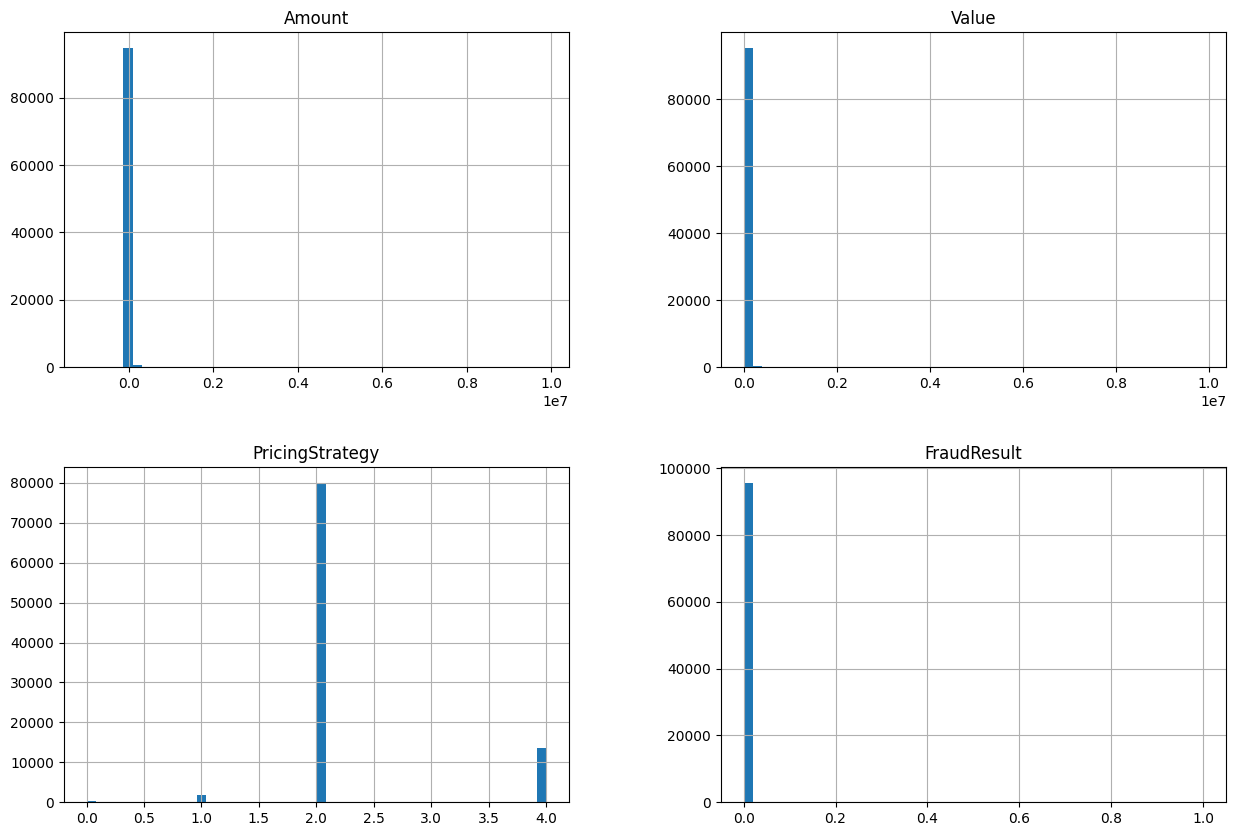

In [103]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

## Bivariate Analysis

In [104]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Amount,Value,PricingStrategy,FraudResult
Amount,1.000000,0.989692,-0.061931,0.557370
Value,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,0.557370,0.566739,-0.033821,1.000000


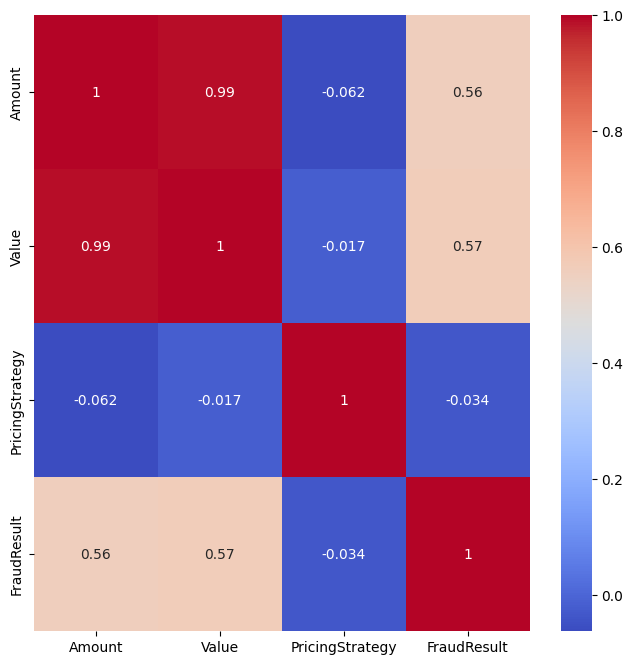

In [105]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(numeric_df.corr(),
            cmap = 'coolwarm',
            annot = True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductCategory  95662 non-null  object 
 1   ChannelId        95662 non-null  object 
 2   Amount           95662 non-null  float64
 3   Value            95662 non-null  int64  
 4   PricingStrategy  95662 non-null  int64  
 5   FraudResult      95662 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.4+ MB


In [107]:
# Perform a 70 / 30 split of data
train, test = sc.split_df(df, 'FraudResult', ratio = 0.7, seed = 999).values()

In [108]:
var = train.drop(['FraudResult', 'CurrencyCode', 'ProductCategory', 'ChannelId'], axis = 1).columns
y_var = train['FraudResult']

def woe_num(x, y):
    bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    global breaks
    breaks = {}
    for i in x:
        bin_object.fit(train[[y, i]])
        breaks[i] = (bin_object.bins[1:-1].tolist())
    return breaks

KeyError: "['CurrencyCode'] not found in axis"

In [62]:
woe_num(var, 'FraudResult')

AttributeError: `np.Inf` was removed in the NumPy 2.0 release. Use `np.inf` instead.

In [109]:
# Check categorical variables names
bins = sc.woebin(train, y = 'FraudResult', x = ['Amount', 'PricingStrategy'], save_breaks_list = 'cat_breaks')

[INFO] creating woe binning ...
[INFO] The breaks_list is saved as cat_breaks_20241006_151906.py


In [110]:
# import dictionary
from cat_breaks_20241006_145417 import breaks_list
breaks_list

# merge
breaks.update(breaks_list)
print(breaks)

{'Amount': [0.0], 'PricingStrategy': [4.0]}


In [111]:
bins_adj = sc.woebin(df, 'FraudResult', breaks_list= breaks, positive = 'fraudresult|0') # change positive to adjust WOE to ln(GOOD / BAD)

[INFO] creating woe binning ...


{'ChannelId': <Figure size 640x480 with 2 Axes>,
 'PricingStrategy': <Figure size 640x480 with 2 Axes>,
 'ProductCategory': <Figure size 640x480 with 2 Axes>,
 'Amount': <Figure size 640x480 with 2 Axes>,
 'Value': <Figure size 640x480 with 2 Axes>}

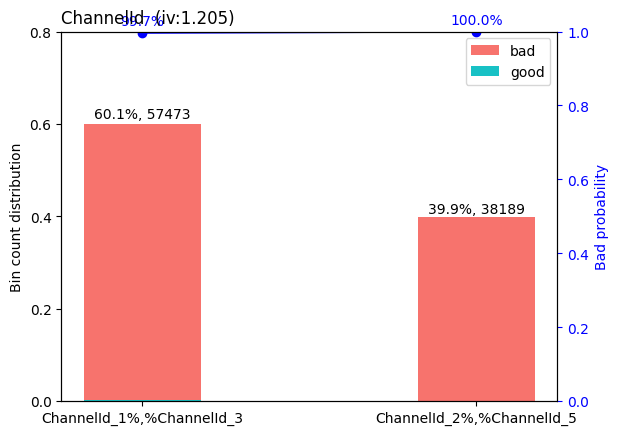

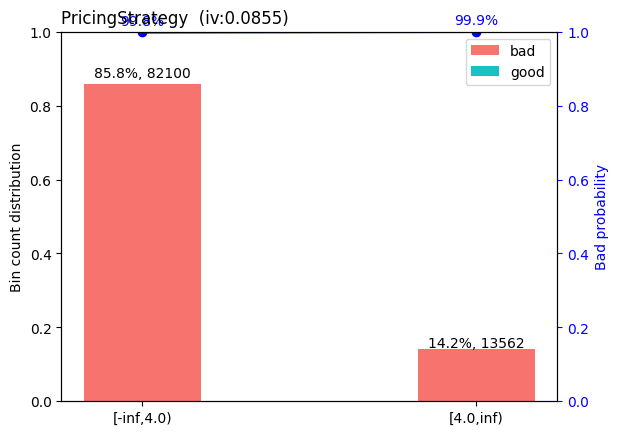

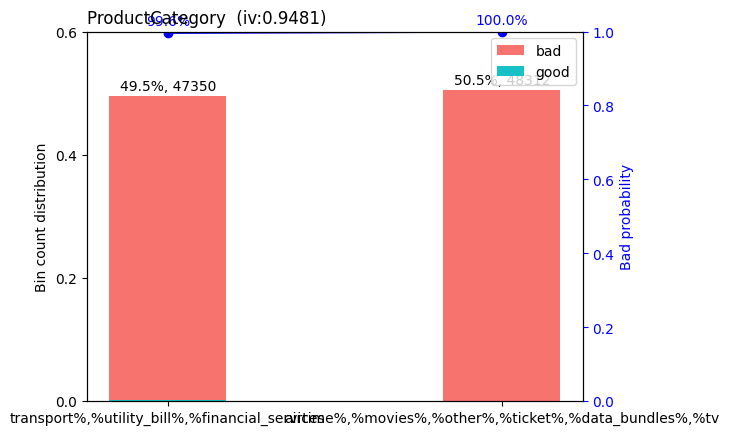

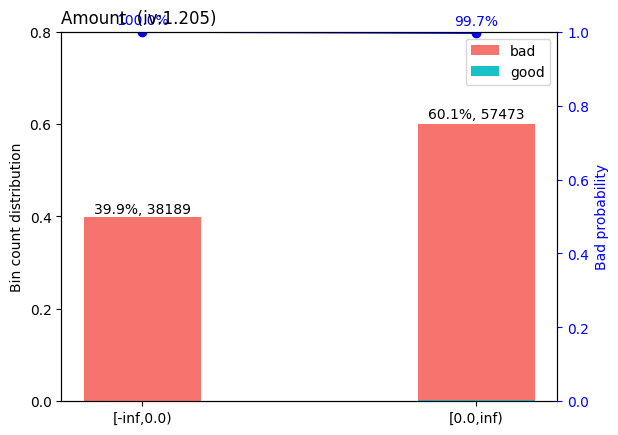

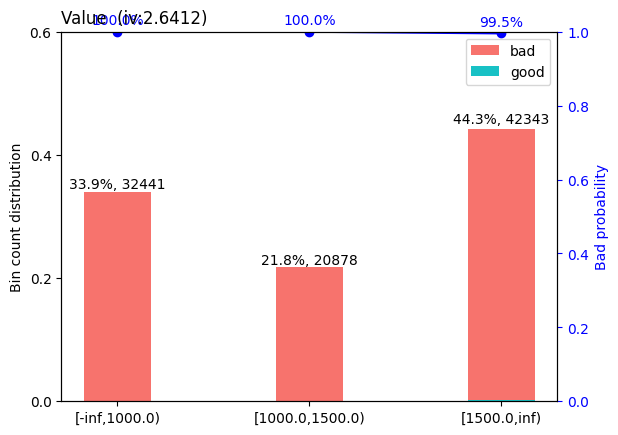

In [112]:
sc.woebin_plot(bins_adj)

In [113]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [114]:
# Merge by index
train_final = train.merge(train_woe, how = 'left', left_index=True, right_index=True)
test_final = test.merge(test_woe, how = 'left', left_index=True, right_index=True)

In [115]:
train_final.head(10)

,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult_x,FraudResult_y,ChannelId_woe,PricingStrategy_woe,ProductCategory_woe,Amount_woe,Value_woe
0,airtime,ChannelId_3,1000.0,1000,2,0,0,-0.484515,-0.094399,1.690824,-0.484515,3.742537
1,financial_services,ChannelId_2,-20.0,20,2,0,0,2.736867,-0.094399,-0.607033,2.736867,4.183281
4,financial_services,ChannelId_2,-644.0,644,2,0,0,2.736867,-0.094399,-0.607033,2.736867,4.183281
5,airtime,ChannelId_3,2000.0,2000,2,0,0,-0.484515,-0.094399,1.690824,-0.484515,-0.807103
8,airtime,ChannelId_3,500.0,500,2,0,0,-0.484515,-0.094399,1.690824,-0.484515,4.183281
9,financial_services,ChannelId_3,600.0,600,2,0,0,-0.484515,-0.094399,-0.607033,-0.484515,4.183281
11,financial_services,ChannelId_2,-40.0,40,2,0,0,2.736867,-0.094399,-0.607033,2.736867,4.183281
12,financial_services,ChannelId_3,600.0,600,2,0,0,-0.484515,-0.094399,-0.607033,-0.484515,4.183281
13,financial_services,ChannelId_3,4000.0,4000,2,0,0,-0.484515,-0.094399,-0.607033,-0.484515,-0.807103
14,financial_services,ChannelId_3,4000.0,4000,2,0,0,-0.484515,-0.094399,-0.607033,-0.484515,-0.807103


In [116]:
train_final = train_final.drop(columns = 'FraudResult_x').rename(columns={'FraudResult_x':'vd'})
test_final = test_final.drop(columns = 'FraudResult_y').rename(columns={'FraudResult_y':'vd'})

In [117]:
# missing check
train_final.stb.missing()

,missing,total,percent
ProductCategory,0,66963,0.0
ChannelId,0,66963,0.0
Amount,0,66963,0.0
Value,0,66963,0.0
PricingStrategy,0,66963,0.0
FraudResult_y,0,66963,0.0
ChannelId_woe,0,66963,0.0
PricingStrategy_woe,0,66963,0.0
ProductCategory_woe,0,66963,0.0
Amount_woe,0,66963,0.0


In [118]:
# missing check
test_final.stb.missing()

,missing,total,percent
ProductCategory,0,28699,0.0
ChannelId,0,28699,0.0
Amount,0,28699,0.0
Value,0,28699,0.0
PricingStrategy,0,28699,0.0
FraudResult_x,0,28699,0.0
ChannelId_woe,0,28699,0.0
PricingStrategy_woe,0,28699,0.0
ProductCategory_woe,0,28699,0.0
Amount_woe,0,28699,0.0


In [119]:
# This function calculates information value (IV) for multiple x variables
sc.iv(train_final, y = 'FraudResult_y')

,variable,info_value
8,Value,6.859063
7,Amount,6.712406
3,Value_woe,2.481423
2,Amount_woe,1.457114
4,ChannelId_woe,1.457114
0,ChannelId,1.419512
9,ProductCategory_woe,0.932981
6,ProductCategory,0.917842
1,PricingStrategy,0.716379
5,PricingStrategy_woe,0.083034


In [120]:
# This function filter variables base on specified conditions, such as information value,
# missing rate, identical value rate.
sc.var_filter(train_final, y = 'FraudResult_y')

[INFO] filtering variables ...


,ChannelId,PricingStrategy,Amount_woe,Value_woe,ChannelId_woe,PricingStrategy_woe,ProductCategory,Amount,Value,ProductCategory_woe,FraudResult_y
0,ChannelId_3,2,-0.484515,3.742537,-0.484515,-0.094399,airtime,1000.0,1000,1.690824,0
1,ChannelId_2,2,2.736867,4.183281,2.736867,-0.094399,financial_services,-20.0,20,-0.607033,0
4,ChannelId_2,2,2.736867,4.183281,2.736867,-0.094399,financial_services,-644.0,644,-0.607033,0
5,ChannelId_3,2,-0.484515,-0.807103,-0.484515,-0.094399,airtime,2000.0,2000,1.690824,0
8,ChannelId_3,2,-0.484515,4.183281,-0.484515,-0.094399,airtime,500.0,500,1.690824,0
...,...,...,...,...,...,...,...,...,...,...,...
95656,ChannelId_3,2,-0.484515,-0.807103,-0.484515,-0.094399,airtime,50000.0,50000,1.690824,0
95658,ChannelId_3,2,-0.484515,3.742537,-0.484515,-0.094399,airtime,1000.0,1000,1.690824,0
95659,ChannelId_2,2,2.736867,4.183281,2.736867,-0.094399,financial_services,-20.0,20,-0.607033,0
95660,ChannelId_3,2,-0.484515,-0.807103,-0.484515,-0.094399,tv,3000.0,3000,1.690824,0


In [121]:
test_final.columns

Index(['ProductCategory', 'ChannelId', 'Amount', 'Value', 'PricingStrategy', 'FraudResult_x', 'ChannelId_woe', 'PricingStrategy_woe', 'ProductCategory_woe', 'Amount_woe', 'Value_woe'], dtype='object')

In [122]:
y_train = train_final.loc[:,'FraudResult_y']
X_train = train_final.loc[:,train_final.columns != 'FraudResult_y']
y_test = test_final.loc[:,'FraudResult_x']
X_test = test_final.loc[:,train_final.columns != 'FraudResult_x']

In [123]:
from sklearn.linear_model import LogisticRegression

# Specify the solver as 'liblinear' to use L1 penalty
lr = LogisticRegression(penalty='l1', C=0.9, solver='liblinear')
lr.fit(X_train, y_train)

# Print the coefficients
print(lr.coef_)


ValueError: could not convert string to float: 'airtime'